#SCRAPPING DATA

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token= reviews(
    'com.pahamify.android',
    lang= 'id',
    country= 'id',
    sort= Sort.MOST_RELEVANT,
    count= 3000,
    filter_score_with= None
)

In [ ]:
datapahamify= pd.DataFrame(np.array(result), columns=['review'])
datapahamify= datapahamify.join(pd.DataFrame(datapahamify.pop('review').tolist()))
datapahamify.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b5950096-fac9-4857-b004-0e3b128c6c11,Imam Firmansyah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Materi yang disampaikan sudah bagus, mudah dim...",4,1,2.10.6,2023-11-07 09:51:24,None,NaT,2.10.6
1,89f89551-12b1-4427-a640-e46cbd7f6794,Han Giok beng,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenarnya pembelajaran di pahamify sudah cuku...,3,4,2.10.6,2023-11-04 05:49:31,None,NaT,2.10.6
2,c91a7093-0148-4c43-b190-7ea217520810,14. Ilham Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasinya udah bagus banget dan sangat memba...,4,2,2.10.6,2023-11-11 07:56:33,None,NaT,2.10.6
3,dbbc0124-60ca-4d8c-9696-48870b3d8452,Nadya Luthfiyah,https://play-lh.googleusercontent.com/a-/ALV-U...,yang bener aja ka? masa android versi 13 kebaw...,1,16,2.10.3,2023-09-12 13:35:54,None,NaT,2.10.3
4,c7459290-da9b-495a-8460-64166621d38e,Yoelando Sibarani,https://play-lh.googleusercontent.com/a-/ALV-U...,Ini kok force close terus ya min di hp aku pad...,1,16,2.10.4,2023-09-18 17:24:19,None,NaT,2.10.4


In [ ]:
datapahamify.shape

(3000, 11)

In [ ]:
newdata= datapahamify[['content','score']]
newdata.head()

,content,score
0,"Materi yang disampaikan sudah bagus, mudah dim...",4
1,Sebenarnya pembelajaran di pahamify sudah cuku...,3
2,Aplikasinya udah bagus banget dan sangat memba...,4
3,yang bener aja ka? masa android versi 13 kebaw...,1
4,Ini kok force close terus ya min di hp aku pad...,1


In [ ]:
def pelabelan(score) :
  if score < 3:
    return 'Negatif'
  elif score == 3:
    return 'Netral'
  elif score > 3:
    return "Positif"
newdata['Label'] = newdata ['score'].apply(pelabelan)
newdata.head()


<ipython-input-7-6c73f015dd03>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Label'] = newdata ['score'].apply(pelabelan)


,content,score,Label
0,"Materi yang disampaikan sudah bagus, mudah dim...",4,Positif
1,Sebenarnya pembelajaran di pahamify sudah cuku...,3,Netral
2,Aplikasinya udah bagus banget dan sangat memba...,4,Positif
3,yang bener aja ka? masa android versi 13 kebaw...,1,Negatif
4,Ini kok force close terus ya min di hp aku pad...,1,Negatif


#PRE_PROCESSING DATA

In [ ]:
newdata.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [ ]:
newdata.duplicated().sum()

16

In [ ]:
databersih= newdata.drop_duplicates()
databersih.duplicated().sum()

0

In [ ]:
databersih.shape

(2984, 3)

In [ ]:
databersih.to_excel("Scrapping data pahamify from playstore.xlsx", index= False)

In [ ]:
!pip install nltk
!pip install sastrawi
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopword')
nltk.download('punkt')

[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
filepath = '/content/Scrapping data pahamify from playstore.xlsx'
databersih = pd.read_excel(filepath)

In [ ]:
def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

databersih['content'] = databersih['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

databersih['content'] = databersih['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

databersih['content'] = databersih['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

databersih['content'] = databersih['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

databersih['content'] = databersih['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

databersih['content'] = databersih['content'].apply(remove_single_char)


print('Hasil Cleaning: \n')
databersih.head()

Hasil Cleaning: 



,content,score,Label
0,Materi yang disampaikan sudah bagus mudah dime...,4,Positif
1,Sebenarnya pembelajaran di pahamify sudah cuku...,3,Netral
2,Aplikasinya udah bagus banget dan sangat memba...,4,Positif
3,yang bener aja ka masa android versi kebawah g...,1,Negatif
4,Ini kok force close terus ya min di hp aku pad...,1,Negatif


In [ ]:
import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
databersih['content'] = databersih['content'].apply(casefolding)
print('Hasil Case Folding: \n')
databersih.head()

Hasil Case Folding: 



,content,score,Label
0,materi yang disampaikan sudah bagus mudah dime...,4,Positif
1,sebenarnya pembelajaran di pahamify sudah cuku...,3,Netral
2,aplikasinya udah bagus banget dan sangat memba...,4,Positif
3,yang bener aja ka masa android versi kebawah g...,1,Negatif
4,ini kok force close terus ya min di hp aku pad...,1,Negatif


In [ ]:
databersih.to_excel('pahamifycleaning.xlsx', index=False)

In [ ]:
data_fold = pd.read_excel('pahamifycleaning.xlsx')
print(data_fold.shape)
data_fold.head()

(2984, 3)


,content,score,Label
0,materi yang disampaikan sudah bagus mudah dime...,4,Positif
1,sebenarnya pembelajaran di pahamify sudah cuku...,3,Netral
2,aplikasinya udah bagus banget dan sangat memba...,4,Positif
3,yang bener aja ka masa android versi kebawah g...,1,Negatif
4,ini kok force close terus ya min di hp aku pad...,1,Negatif


In [ ]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

databersih['content'] = databersih['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(databersih.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                             content  score    Label
0  [materi, yang, disampaikan, sudah, bagus, muda...      4  Positif
1  [sebenarnya, pembelajaran, di, pahamify, sudah...      3   Netral
2  [aplikasinya, udah, bagus, banget, dan, sangat...      4  Positif
3  [yang, bener, aja, ka, masa, android, versi, k...      1  Negatif
4  [ini, kok, force, close, terus, ya, min, di, h...      1  Negatif


In [ ]:
databersih.to_excel('pahamifytokenizing.xlsx', index=False)

In [ ]:
data_token = pd.read_excel("pahamifytokenizing.xlsx")
print(data_token.shape)
data_token.head()

(2984, 3)


,content,score,Label
0,"['materi', 'yang', 'disampaikan', 'sudah', 'ba...",4,Positif
1,"['sebenarnya', 'pembelajaran', 'di', 'pahamify...",3,Netral
2,"['aplikasinya', 'udah', 'bagus', 'banget', 'da...",4,Positif
3,"['yang', 'bener', 'aja', 'ka', 'masa', 'androi...",1,Negatif
4,"['ini', 'kok', 'force', 'close', 'terus', 'ya'...",1,Negatif


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru','gk', 'aplikasi','apk',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

databersih['content'] = databersih['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(databersih.head())

Hasil Filtering: 

                                             content  score    Label
0  [materi, bagus, mudah, dimengert, aplikasinya,...      4  Positif
1  [pembelajaran, pahamify, bagus, mudah, dimenge...      3   Netral
2  [aplikasinya, bagus, membantu, akses, fitur, b...      4  Positif
3  [bener, ka, android, versi, kebawah, gabisa, p...      1  Negatif
4  [force, close, min, hp, ngerjai, to, gratis, t...      1  Negatif


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
databersih.to_excel('pahamifystopword.xlsx', index=False)

In [ ]:
data_filter = pd.read_excel("pahamifystopword.xlsx")
print(data_filter.shape)
data_filter.head()

(2984, 3)


,content,score,Label
0,"['materi', 'bagus', 'mudah', 'dimengert', 'apl...",4,Positif
1,"['pembelajaran', 'pahamify', 'bagus', 'mudah',...",3,Netral
2,"['aplikasinya', 'bagus', 'membantu', 'akses', ...",4,Positif
3,"['bener', 'ka', 'android', 'versi', 'kebawah',...",1,Negatif
4,"['force', 'close', 'min', 'hp', 'ngerjai', 'to...",1,Negatif


In [ ]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

databersih['content'] = databersih['content'].apply(stemming)
databersih['content'].head()

0    [materi, bagus, mudah, dimengert, aplikasi, ba...
1    [ajar, pahamify, bagus, mudah, erti, force, cl...
2    [aplikasi, bagus, bantu, akses, fitur, bank, g...
3    [bener, ka, android, versi, bawah, gabisa, pak...
4    [force, close, min, hp, ngerjai, to, gratis, t...
Name: content, dtype: object

In [ ]:
databersih.to_excel('pahamifyfinal.xlsx', index=False)

In [ ]:
datafinal = pd.read_excel("pahamifyfinal.xlsx")
print(datafinal.shape)
print(datafinal.head())

(2984, 3)
                                             content  score    Label
0  ['materi', 'bagus', 'mudah', 'dimengert', 'apl...      4  Positif
1  ['ajar', 'pahamify', 'bagus', 'mudah', 'erti',...      3   Netral
2  ['aplikasi', 'bagus', 'bantu', 'akses', 'fitur...      4  Positif
3  ['bener', 'ka', 'android', 'versi', 'bawah', '...      1  Negatif
4  ['force', 'close', 'min', 'hp', 'ngerjai', 'to...      1  Negatif


#TF-IDF

In [ ]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("pahamifyfinal.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

      aaa  aaaaa  aaah  aaghh  aah  aamiin  aanak  aangat  aayyooo  abadabad  \
0     0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
1     0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
2     0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
3     0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
4     0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
...   ...    ...   ...    ...  ...     ...    ...     ...      ...       ...   
2979  0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
2980  0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
2981  0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
2982  0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   
2983  0.0    0.0   0.0    0.0  0.0     0.0    0.0     0.0      0.0       0.0   

      ...  zeniuswkwkwkkw  zennonton  z

#MODELLING

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("pahamifyfinal.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 70:30 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Akurasi (80:20): 0.8207705192629816
Presisi (80:20): 0.7909067033172649
Recall (80:20): 0.8207705192629816
F1 Score (80:20): 0.7944706253186427

Random Forest:
Akurasi (80:20): 0.8040201005025126
Presisi (80:20): 0.7521529524967768
Recall (80:20): 0.8040201005025126
F1 Score (80:20): 0.7677648430238969


#VISUALISASI

wordcloud

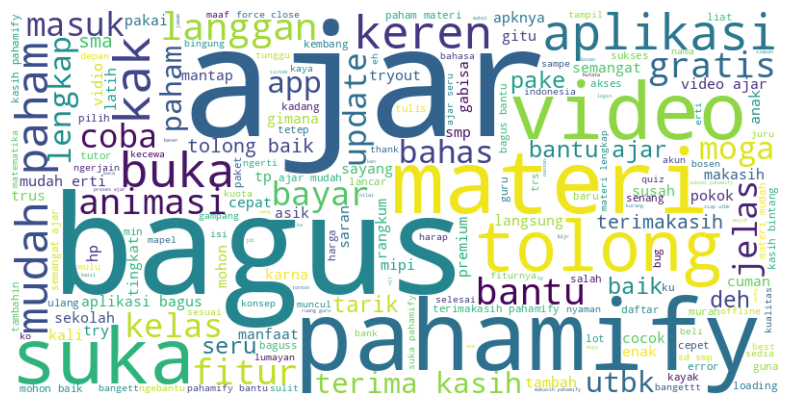

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(' '.join(map(str, content)) for content in databersih['content'])

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


# Tampilkan word cloud dengan matplotlib

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

persebaran sentimen

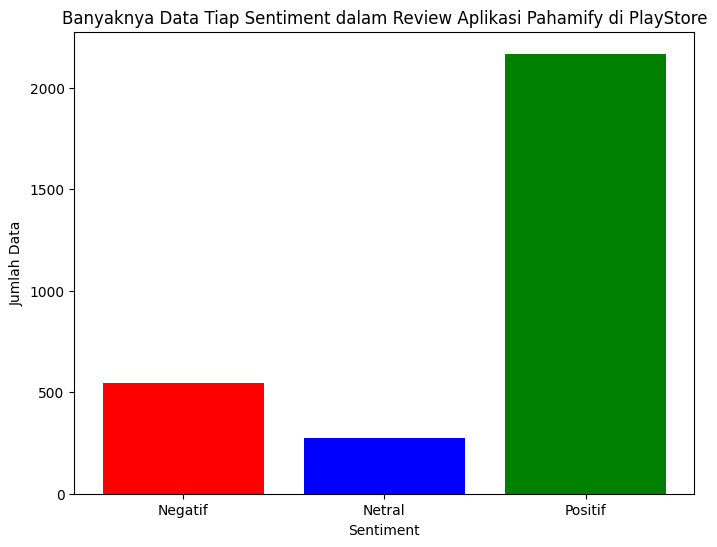

{'Negatif': 545, 'Netral': 272, 'Positif': 2167}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
colors = {'Negatif': 'red', 'Netral': 'blue', 'Positif': 'green'}
plt.bar(unique_targets, target_counts, color=[colors[Label]for Label in unique_targets])
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya Data Tiap Sentiment dalam Review Aplikasi Pahamify di PlayStore')
plt.show()

unique_targets, target_counts = np.unique(y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))